In [264]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [265]:
def fill_empty(a):
    '''
        takes in the list of affect's response string
        returns corresponding response value (1 to 5)
    '''
    a_ss = []
    for s in a:
        if(s=='Strongly Disagree' or s=='Strongly Negative' or s=='Very Low'):
            a_ss.append(1)
        elif(s=='Disagree'):
            a_ss.append(2)
        elif(s=='Neutral'):
            a_ss.append(3)
        elif(s=='Agree'):
            a_ss.append(4)
        elif(s=='Strongly Agree' or s=='Strongly Positive' or s=='Very High'):
            a_ss.append(5)
        elif(np.isnan(s)):
            a_ss.append(0)
        elif(s==1 or s==2 or s==3 or s==4 or s==5):
            a_ss.append(int(s))
    return a_ss

In [266]:
# settings to display all columns
pd.set_option("display.max_columns", None)

In [267]:
df = pd.read_csv('care_ema_raw\data.csv', sep=',')
df

C:\Users\anandadi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (7,8,9,10,12,155) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,asse_name,Record_ID,Record_Status,Part_ID,Day,Initiated,SnzCount,SnzTime1,SnzTime2,SnzTime3,SnzTime4,AssessmentBegin,AssessmentCancelled,ParticipantComplied,AssessmentID,Asse_Type,Asse_Mode,AssessmentEnd,Responded,Completed,AssessmentCompleted,AssessmentNOTCompleted,AssessmentTimedOut,StartDate,Quit_Date1,Quit_Date2,Quit_Date3,Quit_Date4,Activity1,Activity2,Smoking_Items1,Social_Setting1,Social_Setting2,Abstinence_Self_Efficacy1,Affect1,Affect10,Affect11,Affect2,Affect3,Affect4,Affect5,Affect6,Affect7,Affect8,Affect9,Cigarette_Availability1,Concentration1,CopBehavior1,CopBehavior2,Expectancies1,Expectancies2,Hunger1,Motivation1,Motivation2,Restriction1,Smoking_Items2,Smoking_Items3,Stressor1,Stressor2,Stressor3,Stressor4,Urge1,Urge2,Urge3,Activity2a_1,Activity2a_2,Activity2a_3,Activity2a_4,Activity2a_5,Alcohol1,Cigarettes2,Alcohol1a,Alcohol1b,Alcohol1c,Alcohol1d,Alcohol1e,Alcohol1f,Cigarettes1,Cigarettes3,Cigarettes4,DailyCopingInventory1,DailyCopingInventory2,DailyCopingInventory3,DailyCopingInventory4,DailyCopingInventory5,DailyCopingInventory6,DailyCopingInventory7,DailyCopingInventory8,DailyCopingInventory9,ExtrinisicItems1,ExtrinisicItems2,ExtrinisicItems3,ExtrinisicItems4,IntrinsicItems1,IntrinsicItems2,IntrinsicItems3,IntrinsicItems4,PartnerSupport1,PartnerSupport2,PerceivedStress1,PerceivedStress2,PerceivedStress3,PerceivedStress4,SelfReportedDistractionItems1,SelfReportedDistractionItems2,SelfReportedDistractionItems3,SelfReportedDistractionItems4,Sleep1,Sleep2,Sleep3,Sleep4,Location1,Reinforcement1,Reinforcement2,Reinforcement3,Route_To_Slip_Assessment,Slip_Activity1,Slip_Activity2,Slip_Social_Setting1,Slip_Social_Setting2,Attribution1,Attribution2,Attribution3,Attribution4,Intention1,Slip_Abstinence_Self_Efficacy1,Slip_Affect1,Slip_Affect10,Slip_Affect11,Slip_Affect2,Slip_Affect3,Slip_Affect4,Slip_Affect5,Slip_Affect6,Slip_Affect7,Slip_Affect8,Slip_Affect9,Slip_Cigarette_Availability1,Slip_Concentration1,Slip_CopBehavior1,Slip_CopBehavior2,Slip_Expectancies1,Slip_Expectancies2,Slip_Hunger1,Slip_Motivation1,Slip_Motivation2,Slip_Restriction1,Slip_Stressor1,Slip_Stressor2,Slip_Stressor3,Slip_Stressor4,Slip_Urge1,Slip_Urge2,Slip_Urge3,SlipCigarettes1,TimeSinceSmoked1,Slip_Activity2a_1,Slip_Activity2a_2,Slip_Activity2a_3,Slip_Activity2a_4,Slip_Activity2a_5
0,Pre - Quit Random,3eaf4102-058c-43b3-a669-84f3695421a8,Completed,31017,1,2005-05-10 16:10:23,0,NaN,NaN,NaN,NaN,2005-05-10 16:10:47,NaN,NaN,aed9a29b-7e79-4ad9-b9e9-79c77ba9d7a2,2,1,2005-05-10 16:16:04,1.0,1.0,2005-05-10 16:16:04,NaN,NaN,2005-05-10,2005-05-17,2005-05-16 00:00:00,NaN,NaN,0.0,0.0,0.0,1.0,0.0,2.0,2.0,3.0,3.0,5.0,2.0,3.0,2.0,3.0,4.0,4.0,4.0,5.0,4.0,3.0,2.0,4.0,5.0,3.0,2.0,4.0,3.0,NaN,NaN,2.0,1.0,1.0,1.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Pre - Quit Random,d2a1c7ee-0de7-464b-9119-383e2e3a3bb6,Completed,31017,1,2005-05-10 18:24:02,0,NaN,NaN,NaN,NaN,2005-05-10 18:24:26,NaN,NaN,aed9a29b-7e79-4ad9-b9e9-79c77ba9d7a2,2,1,2005-05-10 18:37:34,1.0,1.0,2005-05-10 18:37:36,NaN,NaN,2005-05-10,2005-05-17,2005-05-16 00:00:00,NaN,NaN,0.0,1.0,1.0,1.0,1.0,3.0,4.0,3.0,3.0,5.0,2.0,3.0,4.0,5.0,5.0,5.0,4.0,5.0,5.0,3.0,3.0,3.0,3.0,1.0,3.0,4.0,3.0,4.0,1.0,2.0,3.0,2.0,2.0,5.0,5.0,5.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Pre - Quit Random,fc3361f4-238c-48fd-b00d-c95c7edbf52

In [268]:
comb_df = df.loc[(df['asse_name'] == 'Post - Quit Random')]
comb_df

,asse_name,Record_ID,Record_Status,Part_ID,Day,Initiated,SnzCount,SnzTime1,SnzTime2,SnzTime3,SnzTime4,AssessmentBegin,AssessmentCancelled,ParticipantComplied,AssessmentID,Asse_Type,Asse_Mode,AssessmentEnd,Responded,Completed,AssessmentCompleted,AssessmentNOTCompleted,AssessmentTimedOut,StartDate,Quit_Date1,Quit_Date2,Quit_Date3,Quit_Date4,Activity1,Activity2,Smoking_Items1,Social_Setting1,Social_Setting2,Abstinence_Self_Efficacy1,Affect1,Affect10,Affect11,Affect2,Affect3,Affect4,Affect5,Affect6,Affect7,Affect8,Affect9,Cigarette_Availability1,Concentration1,CopBehavior1,CopBehavior2,Expectancies1,Expectancies2,Hunger1,Motivation1,Motivation2,Restriction1,Smoking_Items2,Smoking_Items3,Stressor1,Stressor2,Stressor3,Stressor4,Urge1,Urge2,Urge3,Activity2a_1,Activity2a_2,Activity2a_3,Activity2a_4,Activity2a_5,Alcohol1,Cigarettes2,Alcohol1a,Alcohol1b,Alcohol1c,Alcohol1d,Alcohol1e,Alcohol1f,Cigarettes1,Cigarettes3,Cigarettes4,DailyCopingInventory1,DailyCopingInventory2,DailyCopingInventory3,DailyCopingInventory4,DailyCopingInventory5,DailyCopingInventory6,DailyCopingInventory7,DailyCopingInventory8,DailyCopingInventory9,ExtrinisicItems1,ExtrinisicItems2,ExtrinisicItems3,ExtrinisicItems4,IntrinsicItems1,IntrinsicItems2,IntrinsicItems3,IntrinsicItems4,PartnerSupport1,PartnerSupport2,PerceivedStress1,PerceivedStress2,PerceivedStress3,PerceivedStress4,SelfReportedDistractionItems1,SelfReportedDistractionItems2,SelfReportedDistractionItems3,SelfReportedDistractionItems4,Sleep1,Sleep2,Sleep3,Sleep4,Location1,Reinforcement1,Reinforcement2,Reinforcement3,Route_To_Slip_Assessment,Slip_Activity1,Slip_Activity2,Slip_Social_Setting1,Slip_Social_Setting2,Attribution1,Attribution2,Attribution3,Attribution4,Intention1,Slip_Abstinence_Self_Efficacy1,Slip_Affect1,Slip_Affect10,Slip_Affect11,Slip_Affect2,Slip_Affect3,Slip_Affect4,Slip_Affect5,Slip_Affect6,Slip_Affect7,Slip_Affect8,Slip_Affect9,Slip_Cigarette_Availability1,Slip_Concentration1,Slip_CopBehavior1,Slip_CopBehavior2,Slip_Expectancies1,Slip_Expectancies2,Slip_Hunger1,Slip_Motivation1,Slip_Motivation2,Slip_Restriction1,Slip_Stressor1,Slip_Stressor2,Slip_Stressor3,Slip_Stressor4,Slip_Urge1,Slip_Urge2,Slip_Urge3,SlipCigarettes1,TimeSinceSmoked1,Slip_Activity2a_1,Slip_Activity2a_2,Slip_Activity2a_3,Slip_Activity2a_4,Slip_Activity2a_5
28967,Post - Quit Random,314d78fe-c016-4957-9a90-ace733a9835a,Completed,31017,8,2005-05-17 13:51:53,1,2005-05-17 13:52:15,NaN,NaN,NaN,2005-05-17 13:52:55,NaN,NaN,4d159657-4d70-40af-bddb-9fc9500dd074,2,2,2005-05-17 13:53:14,1.0,1.0,2005-05-17 13:53:14,NaN,NaN,2005-05-10,2005-05-17,2005-05-16 00:00:00,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28968,Post - Quit Random,545c3024-fd5c-40f7-8012-deae3dc51bc4,Completed,31017,9,2005-05-18 07:48:21,0,NaN,NaN,NaN,NaN,2005-05-18 07:48:47,NaN,NaN,4d159657-4d70-40af-bddb-9fc9500dd074,2,2,2005-05-18 07:53:19,1.0,1.0,2005-05-18 07:53:19,NaN,NaN,2005-05-10,2005-05-17,2005-05-16 00:00:00,NaN,NaN,0.0,0.0,0.0,0.0,NaN,4.0,3.0,3.0,3.0,3.0,4.0,3.0,2.0,2.0,3.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,1.0,3.0,3.0,3.0,NaN,NaN,1.0,NaN,1.0,NaN,3.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28969,Post - Quit Random,da58

In [269]:
comb_df = df.loc[(df['asse_name'] == 'Pre - Quit Random')]
comb_df

,asse_name,Record_ID,Record_Status,Part_ID,Day,Initiated,SnzCount,SnzTime1,SnzTime2,SnzTime3,SnzTime4,AssessmentBegin,AssessmentCancelled,ParticipantComplied,AssessmentID,Asse_Type,Asse_Mode,AssessmentEnd,Responded,Completed,AssessmentCompleted,AssessmentNOTCompleted,AssessmentTimedOut,StartDate,Quit_Date1,Quit_Date2,Quit_Date3,Quit_Date4,Activity1,Activity2,Smoking_Items1,Social_Setting1,Social_Setting2,Abstinence_Self_Efficacy1,Affect1,Affect10,Affect11,Affect2,Affect3,Affect4,Affect5,Affect6,Affect7,Affect8,Affect9,Cigarette_Availability1,Concentration1,CopBehavior1,CopBehavior2,Expectancies1,Expectancies2,Hunger1,Motivation1,Motivation2,Restriction1,Smoking_Items2,Smoking_Items3,Stressor1,Stressor2,Stressor3,Stressor4,Urge1,Urge2,Urge3,Activity2a_1,Activity2a_2,Activity2a_3,Activity2a_4,Activity2a_5,Alcohol1,Cigarettes2,Alcohol1a,Alcohol1b,Alcohol1c,Alcohol1d,Alcohol1e,Alcohol1f,Cigarettes1,Cigarettes3,Cigarettes4,DailyCopingInventory1,DailyCopingInventory2,DailyCopingInventory3,DailyCopingInventory4,DailyCopingInventory5,DailyCopingInventory6,DailyCopingInventory7,DailyCopingInventory8,DailyCopingInventory9,ExtrinisicItems1,ExtrinisicItems2,ExtrinisicItems3,ExtrinisicItems4,IntrinsicItems1,IntrinsicItems2,IntrinsicItems3,IntrinsicItems4,PartnerSupport1,PartnerSupport2,PerceivedStress1,PerceivedStress2,PerceivedStress3,PerceivedStress4,SelfReportedDistractionItems1,SelfReportedDistractionItems2,SelfReportedDistractionItems3,SelfReportedDistractionItems4,Sleep1,Sleep2,Sleep3,Sleep4,Location1,Reinforcement1,Reinforcement2,Reinforcement3,Route_To_Slip_Assessment,Slip_Activity1,Slip_Activity2,Slip_Social_Setting1,Slip_Social_Setting2,Attribution1,Attribution2,Attribution3,Attribution4,Intention1,Slip_Abstinence_Self_Efficacy1,Slip_Affect1,Slip_Affect10,Slip_Affect11,Slip_Affect2,Slip_Affect3,Slip_Affect4,Slip_Affect5,Slip_Affect6,Slip_Affect7,Slip_Affect8,Slip_Affect9,Slip_Cigarette_Availability1,Slip_Concentration1,Slip_CopBehavior1,Slip_CopBehavior2,Slip_Expectancies1,Slip_Expectancies2,Slip_Hunger1,Slip_Motivation1,Slip_Motivation2,Slip_Restriction1,Slip_Stressor1,Slip_Stressor2,Slip_Stressor3,Slip_Stressor4,Slip_Urge1,Slip_Urge2,Slip_Urge3,SlipCigarettes1,TimeSinceSmoked1,Slip_Activity2a_1,Slip_Activity2a_2,Slip_Activity2a_3,Slip_Activity2a_4,Slip_Activity2a_5
0,Pre - Quit Random,3eaf4102-058c-43b3-a669-84f3695421a8,Completed,31017,1,2005-05-10 16:10:23,0,NaN,NaN,NaN,NaN,2005-05-10 16:10:47,NaN,NaN,aed9a29b-7e79-4ad9-b9e9-79c77ba9d7a2,2,1,2005-05-10 16:16:04,1.0,1.0,2005-05-10 16:16:04,NaN,NaN,2005-05-10,2005-05-17,2005-05-16 00:00:00,NaN,NaN,0.0,0.0,0.0,1.0,0.0,2.0,2.0,3.0,3.0,5.0,2.0,3.0,2.0,3.0,4.0,4.0,4.0,5.0,4.0,3.0,2.0,4.0,5.0,3.0,2.0,4.0,3.0,NaN,NaN,2.0,1.0,1.0,1.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Pre - Quit Random,d2a1c7ee-0de7-464b-9119-383e2e3a3bb6,Completed,31017,1,2005-05-10 18:24:02,0,NaN,NaN,NaN,NaN,2005-05-10 18:24:26,NaN,NaN,aed9a29b-7e79-4ad9-b9e9-79c77ba9d7a2,2,1,2005-05-10 18:37:34,1.0,1.0,2005-05-10 18:37:36,NaN,NaN,2005-05-10,2005-05-17,2005-05-16 00:00:00,NaN,NaN,0.0,1.0,1.0,1.0,1.0,3.0,4.0,3.0,3.0,5.0,2.0,3.0,4.0,5.0,5.0,5.0,4.0,5.0,5.0,3.0,3.0,3.0,3.0,1.0,3.0,4.0,3.0,4.0,1.0,2.0,3.0,2.0,2.0,5.0,5.0,5.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Pre - Quit Random,fc3361f4-238c-48fd-b00d-c95c7edbf52

In [270]:
# Filter random EMAs from whole dataset
comb_df = df.loc[(df['asse_name'] == 'Pre - Quit Random') | (df['asse_name'] == 'Post - Quit Random') | (df['asse_name'] == 'Relapse Random')]
comb_df

,asse_name,Record_ID,Record_Status,Part_ID,Day,Initiated,SnzCount,SnzTime1,SnzTime2,SnzTime3,SnzTime4,AssessmentBegin,AssessmentCancelled,ParticipantComplied,AssessmentID,Asse_Type,Asse_Mode,AssessmentEnd,Responded,Completed,AssessmentCompleted,AssessmentNOTCompleted,AssessmentTimedOut,StartDate,Quit_Date1,Quit_Date2,Quit_Date3,Quit_Date4,Activity1,Activity2,Smoking_Items1,Social_Setting1,Social_Setting2,Abstinence_Self_Efficacy1,Affect1,Affect10,Affect11,Affect2,Affect3,Affect4,Affect5,Affect6,Affect7,Affect8,Affect9,Cigarette_Availability1,Concentration1,CopBehavior1,CopBehavior2,Expectancies1,Expectancies2,Hunger1,Motivation1,Motivation2,Restriction1,Smoking_Items2,Smoking_Items3,Stressor1,Stressor2,Stressor3,Stressor4,Urge1,Urge2,Urge3,Activity2a_1,Activity2a_2,Activity2a_3,Activity2a_4,Activity2a_5,Alcohol1,Cigarettes2,Alcohol1a,Alcohol1b,Alcohol1c,Alcohol1d,Alcohol1e,Alcohol1f,Cigarettes1,Cigarettes3,Cigarettes4,DailyCopingInventory1,DailyCopingInventory2,DailyCopingInventory3,DailyCopingInventory4,DailyCopingInventory5,DailyCopingInventory6,DailyCopingInventory7,DailyCopingInventory8,DailyCopingInventory9,ExtrinisicItems1,ExtrinisicItems2,ExtrinisicItems3,ExtrinisicItems4,IntrinsicItems1,IntrinsicItems2,IntrinsicItems3,IntrinsicItems4,PartnerSupport1,PartnerSupport2,PerceivedStress1,PerceivedStress2,PerceivedStress3,PerceivedStress4,SelfReportedDistractionItems1,SelfReportedDistractionItems2,SelfReportedDistractionItems3,SelfReportedDistractionItems4,Sleep1,Sleep2,Sleep3,Sleep4,Location1,Reinforcement1,Reinforcement2,Reinforcement3,Route_To_Slip_Assessment,Slip_Activity1,Slip_Activity2,Slip_Social_Setting1,Slip_Social_Setting2,Attribution1,Attribution2,Attribution3,Attribution4,Intention1,Slip_Abstinence_Self_Efficacy1,Slip_Affect1,Slip_Affect10,Slip_Affect11,Slip_Affect2,Slip_Affect3,Slip_Affect4,Slip_Affect5,Slip_Affect6,Slip_Affect7,Slip_Affect8,Slip_Affect9,Slip_Cigarette_Availability1,Slip_Concentration1,Slip_CopBehavior1,Slip_CopBehavior2,Slip_Expectancies1,Slip_Expectancies2,Slip_Hunger1,Slip_Motivation1,Slip_Motivation2,Slip_Restriction1,Slip_Stressor1,Slip_Stressor2,Slip_Stressor3,Slip_Stressor4,Slip_Urge1,Slip_Urge2,Slip_Urge3,SlipCigarettes1,TimeSinceSmoked1,Slip_Activity2a_1,Slip_Activity2a_2,Slip_Activity2a_3,Slip_Activity2a_4,Slip_Activity2a_5
0,Pre - Quit Random,3eaf4102-058c-43b3-a669-84f3695421a8,Completed,31017,1,2005-05-10 16:10:23,0,NaN,NaN,NaN,NaN,2005-05-10 16:10:47,NaN,NaN,aed9a29b-7e79-4ad9-b9e9-79c77ba9d7a2,2,1,2005-05-10 16:16:04,1.0,1.0,2005-05-10 16:16:04,NaN,NaN,2005-05-10,2005-05-17,2005-05-16 00:00:00,NaN,NaN,0.0,0.0,0.0,1.0,0.0,2.0,2.0,3.0,3.0,5.0,2.0,3.0,2.0,3.0,4.0,4.0,4.0,5.0,4.0,3.0,2.0,4.0,5.0,3.0,2.0,4.0,3.0,NaN,NaN,2.0,1.0,1.0,1.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Pre - Quit Random,d2a1c7ee-0de7-464b-9119-383e2e3a3bb6,Completed,31017,1,2005-05-10 18:24:02,0,NaN,NaN,NaN,NaN,2005-05-10 18:24:26,NaN,NaN,aed9a29b-7e79-4ad9-b9e9-79c77ba9d7a2,2,1,2005-05-10 18:37:34,1.0,1.0,2005-05-10 18:37:36,NaN,NaN,2005-05-10,2005-05-17,2005-05-16 00:00:00,NaN,NaN,0.0,1.0,1.0,1.0,1.0,3.0,4.0,3.0,3.0,5.0,2.0,3.0,4.0,5.0,5.0,5.0,4.0,5.0,5.0,3.0,3.0,3.0,3.0,1.0,3.0,4.0,3.0,4.0,1.0,2.0,3.0,2.0,2.0,5.0,5.0,5.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Pre - Quit Random,fc3361f4-238c-48fd-b00d-c95c7edbf52

In [271]:
# Creating a new column 'Final_Quit_Date' that will capture the date when the particpant finally quit. 
# The dataset had multiple quit dates based on if the user changed the mind to quit at some time decided earlier 
comb_df['Final_Quit_Date'] = ''

<ipython-input-271-bbecef7be0a7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comb_df['Final_Quit_Date'] = ''


In [272]:
comb_df.loc[(comb_df['Final_Quit_Date'] == '') & (comb_df['Quit_Date4'].notnull()),'Final_Quit_Date'] = comb_df['Quit_Date4']
comb_df.loc[(comb_df['Final_Quit_Date'] == '') & (comb_df['Quit_Date3'].notnull()),'Final_Quit_Date'] = comb_df['Quit_Date3']
comb_df.loc[(comb_df['Final_Quit_Date'] == '') & (comb_df['Quit_Date2'].notnull()),'Final_Quit_Date'] = comb_df['Quit_Date2']
comb_df.loc[(comb_df['Final_Quit_Date'] == '') & (comb_df['Quit_Date1'].notnull()),'Final_Quit_Date'] = comb_df['Quit_Date1']
comb_df['Initiated'] = pd.to_datetime(df['Initiated'])
comb_df['Final_Quit_Date'] = pd.to_datetime(comb_df['Final_Quit_Date'])
#comb_df['new_day'] = (comb_df['Initiated']-comb_df['Final_Quit_Date']).dt.days
comb_df['new_day'] = (comb_df['Initiated'].dt.date-comb_df['Final_Quit_Date'].dt.date).dt.days

C:\Users\anandadi\Anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
<ipython-input-272-0eff7af40e30>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comb_df['Initiated'] = pd.to_datetime(df['Initiated'])
<ipython-input-272-0eff7af40e30>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

In [273]:
record_status_np = np.array(comb_df['Record_Status'])

incomplete_rand_idx = np.where((record_status_np!='Completed'))[0]
incomplete_rand_df = comb_df.iloc[incomplete_rand_idx,:].reset_index(drop=True)


# Complete EMAs are the ones whose Record_Status is Complete
complete_rand_idx = np.where((record_status_np=='Completed'))[0]
complete_records_df = comb_df.iloc[complete_rand_idx,:].reset_index(drop=True)
# adding a column to complete records dataframe with column name as 'status' and value as 'Complete'
status_list = []
for i in range(len(complete_records_df)):
    status_list.append('Complete')
complete_records_df.insert(161, 'status', status_list)


# Missing EMAs are the incomplete EMAs(from above) whose AssessmentBegin is null
missing_ema_ind_list = incomplete_rand_df[incomplete_rand_df['AssessmentBegin'].isna()].index.tolist()
missing_records_df = incomplete_rand_df.loc[missing_ema_ind_list].reset_index(drop=True)
# adding a column to missing records dataframe with column name as 'status' and value as 'Missing'
status_list = []
for i in range(len(missing_records_df)):
    status_list.append('Missing')
missing_records_df.insert(161, 'status', status_list)


# Incomplete EMAs are the incomplete EMAs(from above) whose AssessmentBegin is not null
incomplete_records_list = incomplete_rand_df[incomplete_rand_df['AssessmentBegin'].notna()].index.tolist()
incomplete_records_df = incomplete_rand_df.loc[incomplete_records_list].reset_index(drop=True)
# adding a column to incomplete records dataframe column name as 'status' and value as 'Incomplete'
status_list = []
for i in range(len(incomplete_records_df)):
    status_list.append('Incomplete')
incomplete_records_df.insert(161, 'status', status_list)


comb_df = pd.concat([missing_records_df, incomplete_records_df, complete_records_df]).reset_index(drop=True)
comb_df

,asse_name,Record_ID,Record_Status,Part_ID,Day,Initiated,SnzCount,SnzTime1,SnzTime2,SnzTime3,SnzTime4,AssessmentBegin,AssessmentCancelled,ParticipantComplied,AssessmentID,Asse_Type,Asse_Mode,AssessmentEnd,Responded,Completed,AssessmentCompleted,AssessmentNOTCompleted,AssessmentTimedOut,StartDate,Quit_Date1,Quit_Date2,Quit_Date3,Quit_Date4,Activity1,Activity2,Smoking_Items1,Social_Setting1,Social_Setting2,Abstinence_Self_Efficacy1,Affect1,Affect10,Affect11,Affect2,Affect3,Affect4,Affect5,Affect6,Affect7,Affect8,Affect9,Cigarette_Availability1,Concentration1,CopBehavior1,CopBehavior2,Expectancies1,Expectancies2,Hunger1,Motivation1,Motivation2,Restriction1,Smoking_Items2,Smoking_Items3,Stressor1,Stressor2,Stressor3,Stressor4,Urge1,Urge2,Urge3,Activity2a_1,Activity2a_2,Activity2a_3,Activity2a_4,Activity2a_5,Alcohol1,Cigarettes2,Alcohol1a,Alcohol1b,Alcohol1c,Alcohol1d,Alcohol1e,Alcohol1f,Cigarettes1,Cigarettes3,Cigarettes4,DailyCopingInventory1,DailyCopingInventory2,DailyCopingInventory3,DailyCopingInventory4,DailyCopingInventory5,DailyCopingInventory6,DailyCopingInventory7,DailyCopingInventory8,DailyCopingInventory9,ExtrinisicItems1,ExtrinisicItems2,ExtrinisicItems3,ExtrinisicItems4,IntrinsicItems1,IntrinsicItems2,IntrinsicItems3,IntrinsicItems4,PartnerSupport1,PartnerSupport2,PerceivedStress1,PerceivedStress2,PerceivedStress3,PerceivedStress4,SelfReportedDistractionItems1,SelfReportedDistractionItems2,SelfReportedDistractionItems3,SelfReportedDistractionItems4,Sleep1,Sleep2,Sleep3,Sleep4,Location1,Reinforcement1,Reinforcement2,Reinforcement3,Route_To_Slip_Assessment,Slip_Activity1,Slip_Activity2,Slip_Social_Setting1,Slip_Social_Setting2,Attribution1,Attribution2,Attribution3,Attribution4,Intention1,Slip_Abstinence_Self_Efficacy1,Slip_Affect1,Slip_Affect10,Slip_Affect11,Slip_Affect2,Slip_Affect3,Slip_Affect4,Slip_Affect5,Slip_Affect6,Slip_Affect7,Slip_Affect8,Slip_Affect9,Slip_Cigarette_Availability1,Slip_Concentration1,Slip_CopBehavior1,Slip_CopBehavior2,Slip_Expectancies1,Slip_Expectancies2,Slip_Hunger1,Slip_Motivation1,Slip_Motivation2,Slip_Restriction1,Slip_Stressor1,Slip_Stressor2,Slip_Stressor3,Slip_Stressor4,Slip_Urge1,Slip_Urge2,Slip_Urge3,SlipCigarettes1,TimeSinceSmoked1,Slip_Activity2a_1,Slip_Activity2a_2,Slip_Activity2a_3,Slip_Activity2a_4,Slip_Activity2a_5,status,Final_Quit_Date,new_day
0,Pre - Quit Random,fc6e2b67-72a7-48e0-937a-32830f339036,Incomplete/Timed Out,31017,2,2005-05-11 19:45:10,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,aed9a29b-7e79-4ad9-b9e9-79c77ba9d7a2,2,1,NaN,NaN,0.0,NaN,2005-05-11 19:48:17,2005-05-11 19:48:15,2005-05-10,2005-05-17,2005-05-16 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Missing,2005-05-16,-5
1,Pre - Quit Random,aa9588b6-683f-46f5-a6aa-afc291fcd274,Incomplete/Timed Out,31017,3,2005-05-12 12:19:23,4,2005-05-12 12:22:09,2005-05-12 12:27:16,2005-05-12 12:32:19,2005-05-12 12:37:34,NaN,NaN,NaN,aed9a29b-7e79-4ad9-b9e9-79c77ba9d7a2,2,1,NaN,1.0,0.0,NaN,2005-05-12 12:45:36,2005-05-12 12:45:36,2005-05-10,2005-05-17,2005-05-16 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [274]:
comb_df.Part_ID.value_counts()

31483    377
31382    351
31593    348
31450    344
31157    338
        ... 
31383     26
31332     22
31346     21
31337     20
31322     16
Name: Part_ID, Length: 390, dtype: int64

In [275]:
orig_df_part_list = comb_df.Part_ID.unique().tolist()
len(orig_df_part_list)

390

In [276]:
df = pd.read_spss('care_ema_121212.sav')
gender_df = df[(df['asse_name_raw'] == 'Post - Quit Random') | (df['asse_name_raw'] == 'Pre - Quit Random') | (df['asse_name_raw'] == 'Relapse Random')]

In [277]:
new_df_part_list = gender_df.Part_ID.unique().tolist()
len(new_df_part_list)

389

In [278]:
[x for x in orig_df_part_list if x not in new_df_part_list]

[31299]

In [279]:
df = pd.read_spss('care_ema_121212.sav')
gender_df = df[(df['asse_name_raw'] == 'Post - Quit Random') | (df['asse_name_raw'] == 'Pre - Quit Random') | (df['asse_name_raw'] == 'Relapse Random')]

df_merged = pd.merge(comb_df, gender_df, how='left', left_index=True,
                     right_index=True, suffixes=('', '_remove'))
  
# remove the duplicate columns
df_merged.drop([i for i in df_merged.columns if 'remove' in i],
               axis=1, inplace=True)

In [280]:
df_merged

,asse_name,Record_ID,Record_Status,Part_ID,Day,Initiated,SnzCount,SnzTime1,SnzTime2,SnzTime3,SnzTime4,AssessmentBegin,AssessmentCancelled,ParticipantComplied,AssessmentID,Asse_Type,Asse_Mode,AssessmentEnd,Responded,Completed,AssessmentCompleted,AssessmentNOTCompleted,AssessmentTimedOut,StartDate,Quit_Date1,Quit_Date2,Quit_Date3,Quit_Date4,Activity1,Activity2,Smoking_Items1,Social_Setting1,Social_Setting2,Abstinence_Self_Efficacy1,Affect1,Affect10,Affect11,Affect2,Affect3,Affect4,Affect5,Affect6,Affect7,Affect8,Affect9,Cigarette_Availability1,Concentration1,CopBehavior1,CopBehavior2,Expectancies1,Expectancies2,Hunger1,Motivation1,Motivation2,Restriction1,Smoking_Items2,Smoking_Items3,Stressor1,Stressor2,Stressor3,Stressor4,Urge1,Urge2,Urge3,Activity2a_1,Activity2a_2,Activity2a_3,Activity2a_4,Activity2a_5,Alcohol1,Cigarettes2,Alcohol1a,Alcohol1b,Alcohol1c,Alcohol1d,Alcohol1e,Alcohol1f,Cigarettes1,Cigarettes3,Cigarettes4,DailyCopingInventory1,DailyCopingInventory2,DailyCopingInventory3,DailyCopingInventory4,DailyCopingInventory5,DailyCopingInventory6,DailyCopingInventory7,DailyCopingInventory8,DailyCopingInventory9,ExtrinisicItems1,ExtrinisicItems2,ExtrinisicItems3,ExtrinisicItems4,IntrinsicItems1,IntrinsicItems2,IntrinsicItems3,IntrinsicItems4,PartnerSupport1,PartnerSupport2,PerceivedStress1,PerceivedStress2,PerceivedStress3,PerceivedStress4,SelfReportedDistractionItems1,SelfReportedDistractionItems2,SelfReportedDistractionItems3,SelfReportedDistractionItems4,Sleep1,Sleep2,Sleep3,Sleep4,Location1,Reinforcement1,Reinforcement2,Reinforcement3,Route_To_Slip_Assessment,Slip_Activity1,Slip_Activity2,Slip_Social_Setting1,Slip_Social_Setting2,Attribution1,Attribution2,Attribution3,Attribution4,Intention1,Slip_Abstinence_Self_Efficacy1,Slip_Affect1,Slip_Affect10,Slip_Affect11,Slip_Affect2,Slip_Affect3,Slip_Affect4,Slip_Affect5,Slip_Affect6,Slip_Affect7,Slip_Affect8,Slip_Affect9,Slip_Cigarette_Availability1,Slip_Concentration1,Slip_CopBehavior1,Slip_CopBehavior2,Slip_Expectancies1,Slip_Expectancies2,Slip_Hunger1,Slip_Motivation1,Slip_Motivation2,Slip_Restriction1,Slip_Stressor1,Slip_Stressor2,Slip_Stressor3,Slip_Stressor4,Slip_Urge1,Slip_Urge2,Slip_Urge3,SlipCigarettes1,TimeSinceSmoked1,Slip_Activity2a_1,Slip_Activity2a_2,Slip_Activity2a_3,Slip_Activity2a_4,Slip_Activity2a_5,status,Final_Quit_Date,new_day,asse_name_raw,day_raw,asse_mode_raw,tot_asse,tot_cancel,tot_othemp,tot_nonemp,pct_nonemp,pct_cancel,pct_othemp,asse_mode_qd,quit_day,day_qd,Affect_PA,Affect_NA,Alcohol_tot,Attribution,DailyCopingInventory2_3,distract,Extrinsic,Intrinsic,Motive,pss_score,Reinforce,Support,Urge_mean,Slip_Affect_PA,Slip_Affect_NA,Slip_Motive,Slip_Urge_mean,age,gender_demo2,partnerstatus,educ,education4,ed2lev,Race,RaceEthnic,RaceEthn4,race3,ins,ins2,income2,income4,employornot,cigsperday,smokerate,timetofirst,bpanas_PA,bpanas_NA,bwsws_craving,bcesd_depressed,bpss,abstin_24hrSRBC_e,abstin_24hrSRBC_f,abstin_24hrB_g,abstin_24hrB_h,abstin_contin_e2,abstin_contin_f2,abstin_contin_g2,abstin_contin_h2,abstin_continITT_e2,abstin_continITT_f2,abstin_continITT_g2,abstin_continITT_h2
0,Pre - Quit Random,fc6e2b67-72a7-48e0-937a-32830f339036,Incomplete/Timed Out,31017,2,2005-05-11 19:45:10,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,aed9a29b-7e79-4ad9-b9e9-79c77ba9d7a2,2,1,NaN,NaN,0.0,NaN,2005-05-11 19:48:17,2005-05-11 19:48:15,2005-05-10,2005-05-17,2005-05-16 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Missing,2005-05-16,-5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [281]:
df_merged.employornot.value_counts()

employed        15354
not employed    13514
Name: employornot, dtype: int64

In [282]:
df_merged.Race.value_counts()

Anglo American/Euro Ame    14858
African American/Black      9543
Other                       4294
Mixed Race                   322
Native American or Alas      114
Asian American               108
Native of Hawaii or oth       68
Name: Race, dtype: int64

In [283]:
df_merged.educ.value_counts()

13 (Some college)          9563
12 (High school)           8677
14 (Vocational or Commu    3246
16 (Four Year College D    2908
11 (High school)           1362
10 (High school)            972
9 (High School)             655
8 (Middle school)           564
18 (Postgraduate Degree     417
17 (Some Postgraduate W     240
7 (Middle School)           193
6 (Middle school)           101
20 (Postgraduate Degree      66
Name: educ, dtype: int64

In [284]:
df_merged.age.min()

21.0

In [285]:
df_merged.age.max()

73.0

In [286]:
len(df_merged.age.value_counts())

49

In [287]:
df_merged[['Part_ID', 'gender_demo2', 'age']]

,Part_ID,gender_demo2,age
0,31017,NaN,NaN
1,31017,NaN,NaN
2,31017,NaN,NaN
3,31017,NaN,NaN
4,31019,NaN,NaN
...,...,...,...
56228,31839,NaN,NaN
56229,31839,Male,46.0
56230,31839,Female,34.0
56231,31839,NaN,NaN


In [288]:
df_merged.Part_ID.value_counts()

31483    377
31382    351
31593    348
31450    344
31157    338
        ... 
31383     26
31332     22
31346     21
31337     20
31322     16
Name: Part_ID, Length: 390, dtype: int64

In [289]:
df_merged.gender_demo2.value_counts()

Female    16911
Male      12396
Name: gender_demo2, dtype: int64

In [290]:
resp_time_df = comb_df[comb_df.status == 'Complete'].reset_index(drop=True)

# settings to display all columns
pd.set_option("display.max_columns", None)
resp_time_tvem_df_1 = resp_time_df[['asse_name','Part_ID','Day','Initiated','AssessmentBegin', 'AssessmentEnd', 'Final_Quit_Date','new_day','status','Smoking_Items2','Affect1','Affect2','Affect3','Affect4','Affect5','Affect6','Affect7','Affect8','Affect9','Affect10','Affect11','Urge1','Urge2','Urge3']]

for i in range(resp_time_tvem_df_1.shape[1]-10):
    resp_time_tvem_df_1.iloc[:,i+10] = fill_empty(resp_time_tvem_df_1.iloc[:,i+10])
    
resp_time_tvem_df_1 = resp_time_tvem_df_1.rename(columns={'Affect1': 'Enthusiastic', 'Affect2': 'happy', 'Affect3':'relaxed',
                        'Affect4':'bored','Affect5':'sad', 'Affect6':'angry', 'Affect7':'anxious' , 'Affect8':'restless', 
                        'Affect9':'stressed','Affect10':'overallmood', 'Affect11':'energylevel'
                            })
resp_time_tvem_df_1 = resp_time_tvem_df_1[(resp_time_tvem_df_1['new_day'] >= -7) & (resp_time_tvem_df_1['new_day'] <= 27)]
resp_time_tvem_df_1['AssessmentBegin'] = pd.to_datetime(resp_time_tvem_df_1['AssessmentBegin'])
resp_time_tvem_df_1['AssessmentEnd'] = pd.to_datetime(resp_time_tvem_df_1['AssessmentEnd'])
resp_time_tvem_df_1.insert(6,'diff_minutes', resp_time_tvem_df_1['AssessmentEnd'] - resp_time_tvem_df_1['AssessmentBegin'])
resp_time_tvem_df_1['diff_minutes'] = round(resp_time_tvem_df_1['diff_minutes']/np.timedelta64(1,'m'),2)
resp_time_tvem_df_1.to_csv(r'care_ema_raw\curated_random_resp_time_ema_care_data.csv', index=False)

C:\Users\anandadi\Anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,asse_name,Part_ID,Day,Initiated,AssessmentBegin,AssessmentEnd,Final_Quit_Date,new_day,status,Smoking_Items2,Enthusiastic,happy,relaxed,bored,sad,angry,anxious,restless,stressed,overallmood,energylevel,Urge1,Urge2,Urge3
0,Pre - Quit Random,31017,1,2005-05-10 16:10:23,2005-05-10 16:10:47,2005-05-10 16:16:04,2005-05-16,-6,Complete,NaN,2,5,2,3,2,3,4,4,4,3,3,5,5,5
1,Pre - Quit Random,31017,1,2005-05-10 18:24:02,2005-05-10 18:24:26,2005-05-10 18:37:34,2005-05-16,-6,Complete,4.0,4,5,2,3,4,5,5,5,4,3,3,5,5,5
2,Pre - Quit Random,31017,2,2005-05-11 08:14:04,2005-05-11 08:14:34,2005-05-11 08:19:49,2005-05-16,-5,Complete,NaN,4,5,5,2,2,1,1,2,2,5,5,5,5,5
3,Pre - Quit Random,31017,2,2005-05-11 11:57:54,2005-05-11 11:58:08,2005-05-11 12:01:54,2005-05-16,-5,Complete,NaN,4,4,5,1,1,1,3,3,2,4,4,2,3,2
4,Pre - Quit Random,31017,2,2005-05-11 14:23:53,2005-05-11 14:24:15,2005-05-11 14:28:11,2005-05-16,-5,Complete,NaN,4,4,4,2,1,1,3,3,2,4,4,4,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41745,Relapse Random,31839,21,2007-05-14 15:14:02,2007-05-14 15:14:26,2007-05-14 15:26:30,2007-05-04,10,Complete,0.0,1,5,5,2,1,1,2,3,3,4,5,5,4,5
41746,Relapse Random,31839,21,2007-05-14 15:42:22,2007-05-14 15:42:43,2007-05-14 15:51:01,2007-05-04,10,Complete,0.0,1,5,5,1,1,1,1,1,3,4,4,5,4,5
41747,Relapse Random,31839,21,2007-05-14 16:39:50,2007-05-14 16:40:14,2007-05-14 17:00:53,2007-05-04,10,Complete,0.0,2,5,3,2,1,1,2,3,2,4,4,5,5,5
41748,Relapse Random,31839,21,2007-05-14 18:37:05,2007-05-14 18:37:20,2007-05-14 18:47:01,2007-05-04,10,Complete,0.0,1,5,3,1,1,1,1,1,3,4,4,5,5,5


In [296]:
resp_time_tvem_df_1['diff_minutes'].mean()

3.1992318038777787

In [297]:
resp_time_tvem_df_1['diff_minutes'].std()

6.957532884869583

In [87]:
# settings to display all columns
pd.set_option("display.max_columns", None)
tvem_df_1 = comb_df[['asse_name','Part_ID','Day','Initiated','Final_Quit_Date','new_day','status','Smoking_Items2','Affect1','Affect2','Affect3','Affect4','Affect5','Affect6','Affect7','Affect8','Affect9','Affect10','Affect11','Urge1','Urge2','Urge3']]
tvem_df_1.head()

,asse_name,Part_ID,Day,Initiated,Final_Quit_Date,new_day,status,Smoking_Items2,Affect1,Affect2,Affect3,Affect4,Affect5,Affect6,Affect7,Affect8,Affect9,Affect10,Affect11,Urge1,Urge2,Urge3
0,Pre - Quit Random,31017,2,2005-05-11 19:45:10,2005-05-16,-5,Missing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Pre - Quit Random,31017,3,2005-05-12 12:19:23,2005-05-16,-4,Missing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Pre - Quit Random,31017,4,2005-05-13 08:34:49,2005-05-16,-3,Missing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Pre - Quit Random,31017,5,2005-05-14 14:24:12,2005-05-16,-2,Missing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Pre - Quit Random,31019,1,2005-06-23 13:14:06,2005-07-02,-9,Missing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
for i in range(tvem_df_1.shape[1]-8):
    tvem_df_1.iloc[:,i+8] = fill_empty(tvem_df_1.iloc[:,i+8])

C:\Users\anandadi\Anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [89]:
tvem_df_1 = tvem_df_1.rename(columns={'Affect1': 'Enthusiastic', 'Affect2': 'happy', 'Affect3':'relaxed',
                        'Affect4':'bored','Affect5':'sad', 'Affect6':'angry', 'Affect7':'anxious' , 'Affect8':'restless', 
                        'Affect9':'stressed','Affect10':'overallmood', 'Affect11':'energylevel'
                            })

In [90]:
tvem_df_1

,asse_name,Part_ID,Day,Initiated,Final_Quit_Date,new_day,status,Smoking_Items2,Enthusiastic,happy,relaxed,bored,sad,angry,anxious,restless,stressed,overallmood,energylevel,Urge1,Urge2,Urge3
0,Pre - Quit Random,31017,2,2005-05-11 19:45:10,2005-05-16,-5,Missing,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Pre - Quit Random,31017,3,2005-05-12 12:19:23,2005-05-16,-4,Missing,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Pre - Quit Random,31017,4,2005-05-13 08:34:49,2005-05-16,-3,Missing,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Pre - Quit Random,31017,5,2005-05-14 14:24:12,2005-05-16,-2,Missing,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Pre - Quit Random,31019,1,2005-06-23 13:14:06,2005-07-02,-9,Missing,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56228,Relapse Random,31839,21,2007-05-14 15:14:02,2007-05-04,10,Complete,0.0,1,5,5,2,1,1,2,3,3,4,5,5,4,5
56229,Relapse Random,31839,21,2007-05-14 15:42:22,2007-05-04,10,Complete,0.0,1,5,5,1,1,1,1,1,3,4,4,5,4,5
56230,Relapse Random,31839,21,2007-05-14 16:39:50,2007-05-04,10,Complete,0.0,2,5,3,2,1,1,2,3,2,4,4,5,5,5
56231,Relapse Random,31839,21,2007-05-14 18:37:05,2007-05-04,10,Complete,0.0,1,5,3,1,1,1,1,1,3,4,4,5,5,5


In [91]:
# In CARE, clicking on the prompts lead to completing the entire assessment in below % age of digital self-reports
total_clicked_prompts = len(tvem_df_1[(tvem_df_1['status'] == 'Complete')]) + len(tvem_df_1[(tvem_df_1['status'] == 'Incomplete')])
total_completed_prompts = len(tvem_df_1[(tvem_df_1['status'] == 'Complete')])
round(((total_completed_prompts / total_clicked_prompts) * 100), 2)

97.19

In [92]:
# In CARE, clicking on the prompts lead to completing the entire assessment in below % age of digital self-reports
comb_df_ind_list = comb_df[comb_df['AssessmentBegin'].notna()].index.tolist()
comb_df_records_df = comb_df.loc[comb_df_ind_list].reset_index(drop=True)
round(((complete_records_df.shape[0] / comb_df_records_df.shape[0]) * 100 ), 2)

97.25

In [93]:
tvem_df_1.new_day.min()

-43

In [94]:
tvem_df_1.new_day.max()

98

In [95]:
# tvem_df_1 = tvem_df_1[(tvem_df_1['new_day'] >= 1) & (tvem_df_1['new_day'] <= 27)]
# tvem_df_1

In [96]:
#tvem_df_1.to_csv(r'care_ema_raw\curated_post_quit_ema_care_data.csv', index=False)

In [97]:
# tvem_df_1 = tvem_df_1[(tvem_df_1['new_day'] >= -7) & (tvem_df_1['new_day'] <= -1)]
# tvem_df_1

In [98]:
#tvem_df_1.to_csv(r'care_ema_raw\curated_pre_quit_ema_care_data.csv', index=False)

### Filter based on participants with atleast one EMA per day

In [99]:
tvem_df_1 = tvem_df_1[(tvem_df_1['new_day'] >= -7) & (tvem_df_1['new_day'] <= 27)]
tvem_df_1

,asse_name,Part_ID,Day,Initiated,Final_Quit_Date,new_day,status,Smoking_Items2,Enthusiastic,happy,relaxed,bored,sad,angry,anxious,restless,stressed,overallmood,energylevel,Urge1,Urge2,Urge3
0,Pre - Quit Random,31017,2,2005-05-11 19:45:10,2005-05-16,-5,Missing,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Pre - Quit Random,31017,3,2005-05-12 12:19:23,2005-05-16,-4,Missing,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Pre - Quit Random,31017,4,2005-05-13 08:34:49,2005-05-16,-3,Missing,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Pre - Quit Random,31017,5,2005-05-14 14:24:12,2005-05-16,-2,Missing,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,Pre - Quit Random,31019,3,2005-06-25 09:51:27,2005-07-02,-7,Missing,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56228,Relapse Random,31839,21,2007-05-14 15:14:02,2007-05-04,10,Complete,0.0,1,5,5,2,1,1,2,3,3,4,5,5,4,5
56229,Relapse Random,31839,21,2007-05-14 15:42:22,2007-05-04,10,Complete,0.0,1,5,5,1,1,1,1,1,3,4,4,5,4,5
56230,Relapse Random,31839,21,2007-05-14 16:39:50,2007-05-04,10,Complete,0.0,2,5,3,2,1,1,2,3,2,4,4,5,5,5
56231,Relapse Random,31839,21,2007-05-14 18:37:05,2007-05-04,10,Complete,0.0,1,5,3,1,1,1,1,1,3,4,4,5,5,5


In [199]:
#tvem_df_1.to_csv(r'care_ema_raw\curated_random_ema_care_data.csv', index=False)

In [160]:
tvem_df_1.Part_ID.nunique()

390

In [186]:
tdf_1 = tvem_df_1.groupby(["new_day","Part_ID"]).filter(lambda g: g['Initiated'].count() >= 1)
tdf_1 = tdf_1.groupby('new_day')['Part_ID'].nunique().reset_index()

In [187]:
tdf_2 = tvem_df_1.groupby(["new_day","Part_ID"]).filter(lambda g: g['Initiated'].count() >= 2)
tdf_2 = tdf_2.groupby('new_day')['Part_ID'].nunique().reset_index()

In [188]:
tdf_3 = tvem_df_1.groupby(["new_day","Part_ID"]).filter(lambda g: g['Initiated'].count() >= 3)
tdf_3 = tdf_3.groupby('new_day')['Part_ID'].nunique().reset_index()

In [189]:
tdf_4 = tvem_df_1.groupby(["new_day","Part_ID"]).filter(lambda g: g['Initiated'].count() >= 4)
tdf_4 = tdf_4.groupby('new_day')['Part_ID'].nunique().reset_index()

In [190]:
tdf = pd.concat([tdf_1,tdf_2,tdf_3,tdf_4], axis=1)
tdf

,new_day,Part_ID,new_day,Part_ID,new_day,Part_ID,new_day,Part_ID
0,-7,285,-7,257,-7,211,-7,135
1,-6,323,-6,320,-6,309,-6,281
2,-5,347,-5,343,-5,331,-5,309
3,-4,366,-4,362,-4,351,-4,323
4,-3,365,-3,363,-3,358,-3,344
5,-2,366,-2,360,-2,355,-2,337
6,-1,360,-1,358,-1,353,-1,337
7,0,369,0,358,0,352,0,323
8,1,353,1,352,1,346,1,334
9,2,349,2,347,2,337,2,328


In [191]:
tdf.columns.values[1] = "1_prompt"
tdf.columns.values[3] = "2_prompt"
tdf.columns.values[5] = "3_prompt"
tdf.columns.values[7] = "4_prompt"
tdf

,new_day,1_prompt,new_day,2_prompt,new_day,3_prompt,new_day,4_prompt
0,-7,285,-7,257,-7,211,-7,135
1,-6,323,-6,320,-6,309,-6,281
2,-5,347,-5,343,-5,331,-5,309
3,-4,366,-4,362,-4,351,-4,323
4,-3,365,-3,363,-3,358,-3,344
5,-2,366,-2,360,-2,355,-2,337
6,-1,360,-1,358,-1,353,-1,337
7,0,369,0,358,0,352,0,323
8,1,353,1,352,1,346,1,334
9,2,349,2,347,2,337,2,328


In [192]:
tdf = tdf.loc[:, ~tdf.columns.duplicated()]

In [193]:
tdf = tdf[tdf.new_day != -7]

In [194]:
N = tvem_df_1.Part_ID.nunique()
N

390

In [195]:
tdf['new_day_modified'] = tdf['new_day'] + 7

In [196]:
tdf['1_prompt_prop'] = round(tdf['1_prompt']/N, 2)
tdf['2_prompt_prop'] = round(tdf['2_prompt']/N, 2)
tdf['3_prompt_prop'] = round(tdf['3_prompt']/N, 2)
tdf['4_prompt_prop'] = round(tdf['4_prompt']/N, 2)
tdf

,new_day,1_prompt,2_prompt,3_prompt,4_prompt,new_day_modified,1_prompt_prop,2_prompt_prop,3_prompt_prop,4_prompt_prop
1,-6,323,320,309,281,1,0.83,0.82,0.79,0.72
2,-5,347,343,331,309,2,0.89,0.88,0.85,0.79
3,-4,366,362,351,323,3,0.94,0.93,0.90,0.83
4,-3,365,363,358,344,4,0.94,0.93,0.92,0.88
5,-2,366,360,355,337,5,0.94,0.92,0.91,0.86
6,-1,360,358,353,337,6,0.92,0.92,0.91,0.86
7,0,369,358,352,323,7,0.95,0.92,0.90,0.83
8,1,353,352,346,334,8,0.91,0.90,0.89,0.86
9,2,349,347,337,328,9,0.89,0.89,0.86,0.84
10,3,338,338,336,324,10,0.87,0.87,0.86,0.83


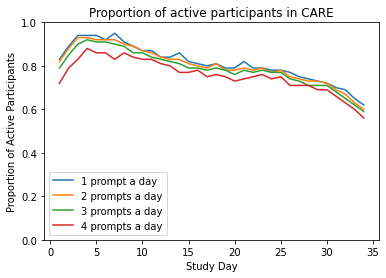

In [197]:
fig = plt.figure()

plt.plot(tdf['new_day_modified'], tdf['1_prompt_prop'])
plt.plot(tdf['new_day_modified'], tdf['2_prompt_prop'])
plt.plot(tdf['new_day_modified'], tdf['3_prompt_prop'])
plt.plot(tdf['new_day_modified'], tdf['4_prompt_prop'])

plt.ylim(0,1)
plt.legend(['1 prompt a day', '2 prompts a day', '3 prompts a day', '4 prompts a day'])
plt.xlabel('Study Day')
plt.ylabel('Proportion of Active Participants')
plt.title('Proportion of active participants in CARE')

plt.show()

In [201]:
# test_df = tvem_df_1.groupby(["Part_ID","new_day"]).apply(lambda x: x[x["new_day"].between(-6, 26, inclusive = True)]["Initiated"].count()).reset_index(name='ema_count')
# test_df['ema_indicator'] = 0
# test_df.loc[test_df['ema_count']>=1, 'ema_indicator'] = 1
# df2 = test_df.groupby('Part_ID').filter(lambda g: g['ema_indicator'].sum() == 33)
# filtered_part_id_list_1 = df2.Part_ID.unique()
# tvem_df_2 = tvem_df_1[tvem_df_1['Part_ID'].isin(filtered_part_id_list_1)]
# tvem_df_2

In [202]:
# difference = list()
# for item in filtered_part_id_list_1:
#     if item not in filtered_part_id_list:
#         difference.append(item)
# difference

In [203]:
# tvem_df_2 = tvem_df_1[tvem_df_1['Part_ID'].isin(filtered_part_id_list_1)]
# tvem_df_2

In [204]:
# test_df = tvem_df_1.groupby(["Part_ID","new_day"])["Initiated"].count().reset_index()
# test_df['ema_indicator'] = 0
# test_df.loc[test_df['Initiated']>=1, 'ema_indicator'] = 1
# df2 = test_df.groupby('Part_ID').filter(lambda g: g['ema_indicator'].sum() == 35)
# filtered_part_id_list = df2.Part_ID.unique()
# tvem_df_2 = tvem_df_1[tvem_df_1['Part_ID'].isin(filtered_part_id_list)]
# tvem_df_2

In [205]:
#tvem_df_2.to_csv(r'care_ema_raw\curated_random_ema_care_data_for_active_users_updated.csv', index=False)

In [206]:
#tvem_df_2.to_csv(r'care_ema_raw\curated_random_ema_care_data_for_active_users.csv', index=False)